In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
import numpy as np 
import pandas as pd

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
seed=8
np.random.seed(seed)

In [4]:
dataset=pd.read_csv('gas_turbines.csv')
dataset.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,114.71,10.644,3.4874,82.440
7,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,114.71,10.656,3.6043,83.010
8,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,114.72,10.644,3.3943,82.284
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.9081,82.782


In [5]:
dataset.shape

(15039, 11)

In [6]:
dataset.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
dataset.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [9]:
dataset[:10]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,114.71,10.644,3.4874,82.440
7,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,114.71,10.656,3.6043,83.010
8,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,114.72,10.644,3.3943,82.284
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.9081,82.782


In [10]:
import seaborn as sns
import matplotlib as plt

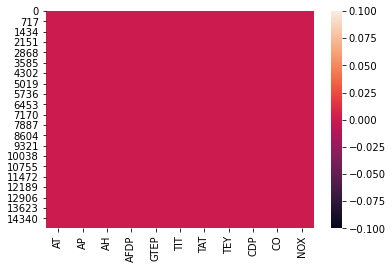

In [11]:
sns.heatmap(dataset.isnull())

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\acer\anaconda3\lib\site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


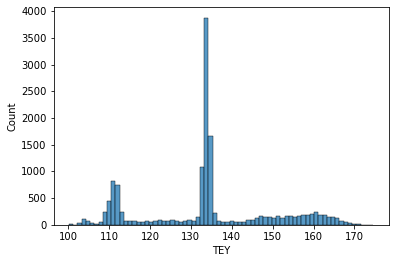

In [15]:
sns.histplot(x='TEY',data=dataset)

In [16]:
 X = dataset.iloc[:,:11]

In [17]:
Y = dataset.iloc[:,-1]

In [19]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [21]:
Y

0        82.722
1        82.776
2        82.468
3        82.670
4        82.311
          ...  
15034    79.559
15035    79.917
15036    90.912
15037    93.227
15038    92.498
Name: NOX, Length: 15039, dtype: float64

In [22]:
## Build an ANN model
model = Sequential()
model.add(layers.Dense(50, input_dim=11,  activation='relu'))
model.add(layers.Dense(11,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [24]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 3s 2ms/step - loss: 47.8558 - acc: 0.0000e+00 - val_loss: -64.3193 - val_acc: 0.0000e+00
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: -103.3421 - acc: 0.0000e+00 - val_loss: -129.0768 - val_acc: 0.0000e+00
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: -172.4871 - acc: 0.0000e+00 - val_loss: -193.7435 - val_acc: 0.0000e+00
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: -241.5882 - acc: 0.0000e+00 - val_loss: -258.3887 - val_acc: 0.0000e+00
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: -310.7057 - acc: 0.0000e+00 - val_loss: -323.0630 - val_acc: 0.0000e+00
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: -379.8081 - acc: 0.0000e+00 - val_loss: -387.7050 - val_acc: 0.0000e+00
Epoch 7/100
1008/1008 [==============================] - 2s 2ms/step - loss: -448.9237 - acc: 0.0000e+00 - va

In [25]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 959us/step - loss: -6765.3867 - acc: 0.0000e+00
acc: 0.00%


In [27]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

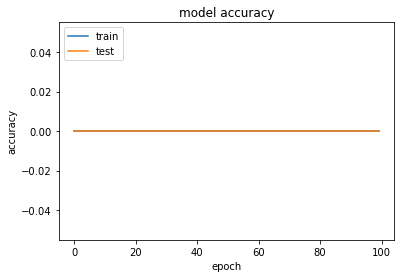

In [29]:
# summarize history for accuracy
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

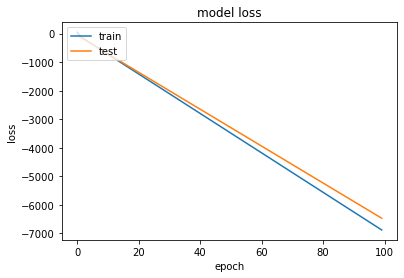

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()